In [41]:
from mongo_client import CovidClient
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

uri = "mongodb://bbddav:MwcC728FK1y98LrjmY0M4dop0SOA6ufv1PfmZ1QvW70gvnuJ4mqY9Lyr3pxdDEHCcqi3D6w2GZfYpujcHsZfpA==@bbddav.mongo.cosmos.azure.com:10255/?ssl=true&replicaSet=globaldb&retrywrites=false&maxIdleTimeMS=120000&appName=@bbddav@"

client = CovidClient(uri, 'covid', 'Worldwide')

## Ejemplos de consultas

### Total de casos confirmados

In [4]:
client.get_total_cases()


3623803

### Total de muertes confirmadas

In [6]:
client.get_total_deaths()

256880

### Casos en España en Marzo

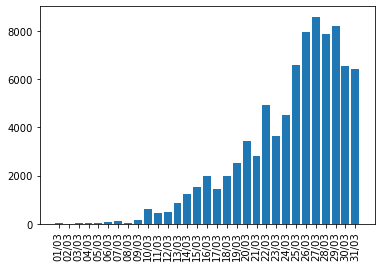

In [110]:
data = client.get_data_country('Spain')
month = 3
cases = []
dates = []

# Get data
for d in data:
    date = d['dateRep']
    if date.month == month:
        cases.append(abs(d['cases']))
        dates.append(date.strftime("%d/%m"))

# Reverse data
cases = cases[::-1]
dates = dates[::-1]
y_pos = np.arange(len(dates))
plt.bar(y_pos, cases)
plt.xticks(y_pos, dates, rotation = 90)
plt.show()

### Muertes en Estados Unidos en Abril

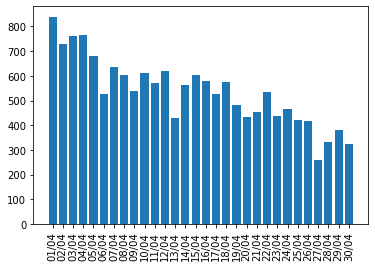

In [116]:
data = client.get_data_country('Italy')
month = 4
deaths = []
dates = []

for d in data:
    date = d['dateRep']
    if date.month == month:
        deaths.append(abs(d['deaths']))
        dates.append(date.strftime("%d/%m"))

# Reverse data
deaths = deaths[::-1]
dates = dates[::-1]
y_pos = np.arange(len(deaths))
plt.bar(y_pos, deaths)
plt.xticks(y_pos, dates, rotation = 90)
plt.show()

### Casos por meses en Italia

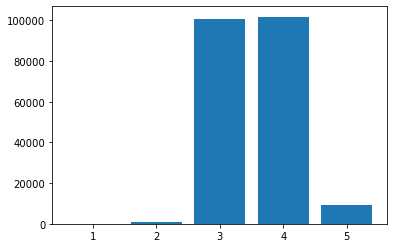

In [126]:
data = client.get_data_country('Italy')
months = {1:0, 2:0, 3:0, 4:0, 5:0}

for d in data:
    months[d['dateRep'].month] += abs(d['cases'])

y_pos = np.arange(len(months.values()))
plt.bar(y_pos, months.values())
plt.xticks(y_pos, months.keys())
plt.show()